<a href="https://colab.research.google.com/github/sbs23096/sbs23096_Analysis_of_Irelands_Construction_Sector/blob/main/CA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [2]:
import pandas as pd #to read the csv files and the files to create a DataFrame
import numpy as np #used for numerical computation
import matplotlib.pyplot as plt #To visualize 
import scipy.stats as stats
import seaborn as sns #used for visualization

In [5]:
#Import Data set
# Read the CSV file into a pandas DataFrame
df_1=pd.read_csv("https://opendata.housing.gov.ie/dataset/f804e6ae-cd1d-4eed-bd59-e454c1dd4e58/resource/4e1f63c4-f4ba-43f3-8db6-636b76a146d4/download/social_housing_construction_status_report_q2_2020.csv")
df_2 = pd.read_csv("https://opendata.housing.gov.ie/dataset/d9e58b11-8ee5-45cb-b4d8-cf0add63f2e9/resource/bb62b38b-0025-462b-8335-922e0f5e3322/download/social_housing_construction_status_report_q3_2020.csv")
df_3 = pd.read_csv("https://opendata.housing.gov.ie/dataset/d3fb01d5-df2e-4f5f-b968-e6b1febb047f/resource/7527707b-8378-423c-8323-ec8710eca505/download/social_housing_construction_status_report_q4_2020.csv")
# Read the JSON data into a pandas DataFrame
df_4 = pd.read_json("https://opendata.housing.gov.ie/dataset/cdbb216a-989c-44e1-b6d0-716f18ac27a9/resource/baf9bc22-cecf-4596-9400-699d79b233b2/download/social_housing_construction_status_report_q1_2021.json")

In [6]:
final_data = pd.concat([df_1,df_2,df_3,df_4],ignore_index=True)

In [7]:
final_data.head()

,No,Funding Programme,LA,Scheme/Project Name,No_ of Units,Approved Housing Body,Stage 1 Capital Appraisal,Stage 2 Pre Planning,Stage 3 Pre Tender design,Stage 4 Tender Report or Final Turnkey/CALF approval,On Site,Completed,No_
0,1.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",6,*N/A,NaN,NaN,NaN,NaN,NaN,Q3-2019,NaN
1,2.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",6,*N/A,NaN,NaN,NaN,NaN,NaN,Q3-2019,NaN
2,3.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",8,*N/A,NaN,NaN,NaN,NaN,Q4-2017,NaN,NaN
3,4.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",12,*N/A,NaN,NaN,NaN,NaN,Q4-2017,NaN,NaN
4,5.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",12,*N/A,NaN,NaN,NaN,NaN,Q4-2017,NaN,NaN


In [8]:
final_data.columns #shows the no of columns

Index(['No', 'Funding Programme', 'LA', 'Scheme/Project Name', 'No_ of Units',
       'Approved Housing Body', 'Stage 1 Capital Appraisal',
       'Stage 2 Pre Planning', 'Stage 3 Pre Tender design',
       'Stage 4 Tender Report or Final Turnkey/CALF approval', 'On Site',
       'Completed', 'No_'],
      dtype='object')

In [9]:
final_data.shape #shows the shape of data how many rows and columns are present

(9254, 13)

In [10]:
final_data.isnull().sum() #check how many null values in the data

No                                                      7100
Funding Programme                                          0
LA                                                         0
Scheme/Project Name                                        0
No_ of Units                                               0
Approved Housing Body                                      0
Stage 1 Capital Appraisal                               6428
Stage 2 Pre Planning                                    6469
Stage 3 Pre Tender design                               6648
Stage 4 Tender Report or Final Turnkey/CALF approval    6206
On Site                                                 5319
Completed                                               3030
No_                                                     2154
dtype: int64

In [11]:
final_data.dropna() #to drop all the null values

,No,Funding Programme,LA,Scheme/Project Name,No_ of Units,Approved Housing Body,Stage 1 Capital Appraisal,Stage 2 Pre Planning,Stage 3 Pre Tender design,Stage 4 Tender Report or Final Turnkey/CALF approval,On Site,Completed,No_


In [12]:
final_data["Scheme/Project Name"].value_counts() #count the values in the specific column

Carrigbrook, Tullow Road, Carlow                            24
Mill Race Park, Drumlish                                    23
Heatherside, Vale Road, Arklow                              20
Kylebroughlan, Moycullen                                    20
Racecourse Commons, Lusk                                    20
                                                            ..
1 & 2 Druminshingore, Newtowngore                            1
Kilmoney, Carrigaline, Co. Cork                              1
5 Bridgegate Drive, Bridgegate, Ardee, Co. Louth             1
O'Loughlin Court, Kilkenny  (Phase 1)                        1
Sessile Oaks, Ballyguile, Wicklow, Co. Wicklow (Phase 3)     1
Name: Scheme/Project Name, Length: 2620, dtype: int64

In [13]:
final_data.isnull().sum()

No                                                      7100
Funding Programme                                          0
LA                                                         0
Scheme/Project Name                                        0
No_ of Units                                               0
Approved Housing Body                                      0
Stage 1 Capital Appraisal                               6428
Stage 2 Pre Planning                                    6469
Stage 3 Pre Tender design                               6648
Stage 4 Tender Report or Final Turnkey/CALF approval    6206
On Site                                                 5319
Completed                                               3030
No_                                                     2154
dtype: int64

In [14]:
final_data["Completed"].value_counts()#count the values in the specific column

Q4-2019    1148
            935
Q4-2018     796
Q4-2020     477
Q3-2019     300
Q4-2017     292
Q3-2018     276
Q2-2019     268
Q3-2020     231
Q2-2018     224
Q1-2018     188
Q2-2020     175
Q1-2019     168
Q3-2017     124
Q2-2017     124
Q4-2016     119
Q1-2017     104
Q2-2016      80
Q1-2020      68
Q3-2016      56
Q1-2021      51
Q1-2016      20
Name: Completed, dtype: int64

In [15]:
final_data["Approved Housing Body"].value_counts() #count the values in the specific column

*N/A                                               5324
Cluid Housing                                       845
T�ath Housing Association                           683
Respond                                             428
Co - Operative Housing Ireland Society Limited      407
                                                   ... 
Ark Housing Association Limited                       2
Foscadh Housing Association Ltd                       1
Kingdom Voluntary Housing Association                 1
DePaul Housing                                        1
SPADE � St. Patrick�s Dwellings for the Elderly       1
Name: Approved Housing Body, Length: 93, dtype: int64

In [16]:
final_data["No_ of Units"].value_counts() #count the values in the specific column

4      842
2      762
1      685
6      612
8      494
      ... 
95       2
76       1
200      1
156      1
94       1
Name: No_ of Units, Length: 100, dtype: int64

In [17]:
final_data["LA"].value_counts() #count the values in the specific column

Cork County      762
Louth            663
Dublin City      522
Kildare          510
Meath            509
Cork City        438
Fingal           436
Limerick         420
Wexford          378
South Dublin     375
Wicklow          345
Kerry            337
Kilkenny         278
Galway County    275
Tipperary        267
DLR              248
Mayo             236
Carlow           225
Laois            220
Donegal          205
Westmeath        202
Waterford        195
Galway City      184
Clare            180
Monaghan         178
Longford         169
Cavan            158
Offaly           123
Roscommon         77
Sligo             71
Leitrim           68
Name: LA, dtype: int64

In [18]:
final_data["Funding Programme"].value_counts() #count the values in the specific column

SHIP CONSTRUCTION                        2450
CALF Turnkey                             2237
SHIP CONSTRUCTION TURNKEY                2093
CALF TURNKEY                              733
CAS CONSTRUCTION                          634
REGENERATION                              215
SHIP CONSTRUCTION SINGLE STAGE            202
CALF Construction                         164
SHIP CONSTRUCTION RAPID                   157
CAS CONSTRUCTION TURNKEY                   90
SHIP DIALOG                                75
SHIP CONSTRUCTION RAPID VOLUMETRIC         71
CALF CONSTRUCTION                          54
PUBLIC PRIVATE PARTNERSHIP (Bundle 2)      32
PUBLIC PRIVATE PARTNERSHIP (Bundle 1)      32
CAS CONSTRUCTION SINGLE STAGE              15
Name: Funding Programme, dtype: int64

**Descriptive** Statics

In [19]:
final_data.describe() #statistical data of dataset

,No,No_ of Units,No_
count,2154.000000,9254.000000,7100.000000
mean,1077.500000,14.047763,1184.664366
std,621.950561,16.377131,684.673885
min,1.000000,1.000000,1.000000
25%,539.250000,4.000000,592.000000
50%,1077.500000,9.000000,1184.000000
75%,1615.750000,18.000000,1775.250000
max,2154.000000,200.000000,2434.000000


<ipython-input-20-ba4795c47e4e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = final_data.corr() #heatmap to correlate the dataset


<Axes: >

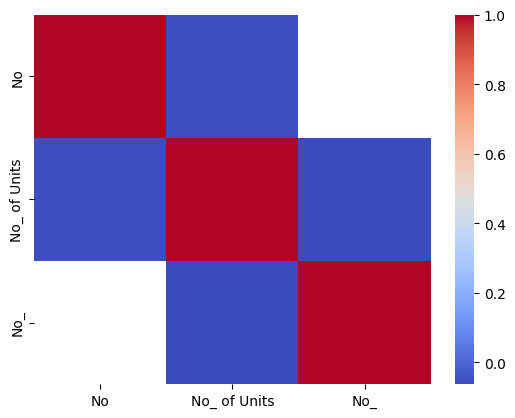

In [20]:
corr = final_data.corr() #heatmap to correlate the dataset
sns.heatmap(corr,cmap="coolwarm")

In [21]:
final_data.dtypes

No                                                      float64
Funding Programme                                        object
LA                                                       object
Scheme/Project Name                                      object
No_ of Units                                              int64
Approved Housing Body                                    object
Stage 1 Capital Appraisal                                object
Stage 2 Pre Planning                                     object
Stage 3 Pre Tender design                                object
Stage 4 Tender Report or Final Turnkey/CALF approval     object
On Site                                                  object
Completed                                                object
No_                                                     float64
dtype: object

**funding programme vs. no.of units**

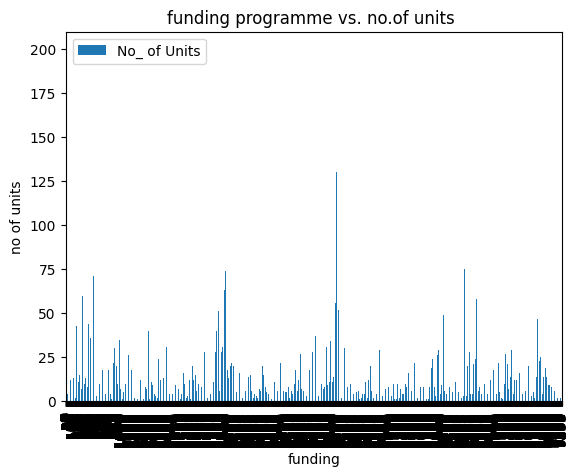

In [22]:
#to visualize the graph
final_data[['Funding Programme','No_ of Units']].plot(kind='bar')
plt.xlabel('funding')
plt.ylabel('no of units')
plt.title('funding programme vs. no.of units ')
plt.legend()
plt.show()

**Distribution of Total approved housing and units**

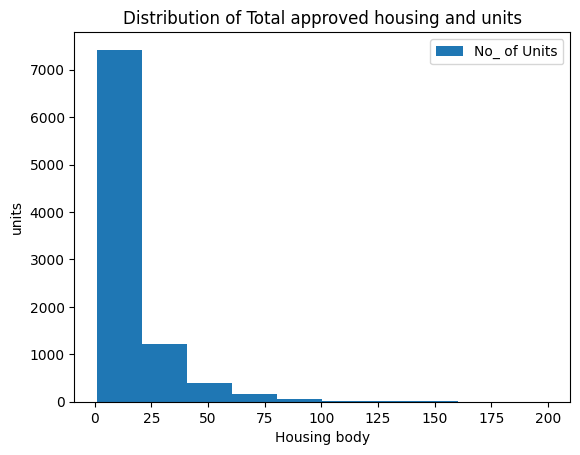

In [ ]:
final_data[['Approved Housing Body', 'No_ of Units']].plot(kind='hist', bins=10)
plt.xlabel('Housing body')
plt.ylabel('units')
plt.title('Distribution of Total approved housing and units')
plt.legend()
plt.show()

**Box Plot of completed and units**

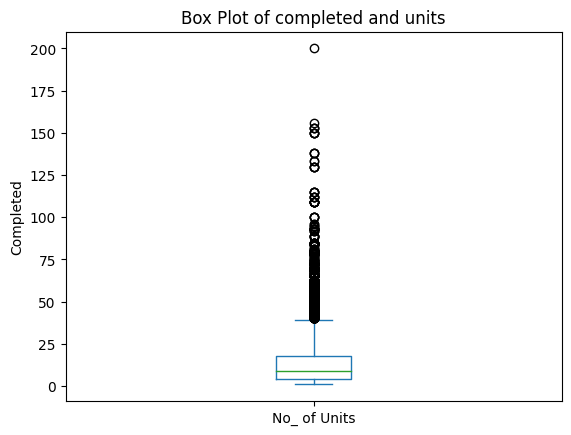

In [ ]:
final_data[['Completed', 'No_ of Units']].plot(kind='box')
plt.ylabel('Completed')
plt.title('Box Plot of completed and units')
plt.show()

**Frequency Distribution of LA**

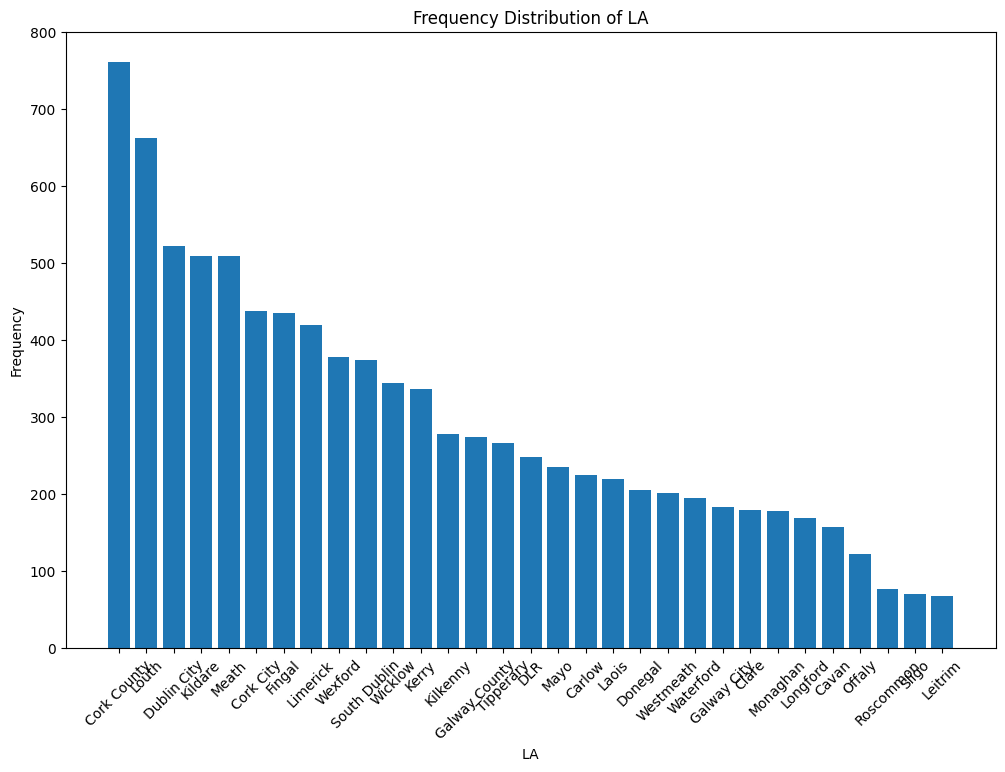

In [ ]:
plt.figure(figsize=(12,8))
la_counts = final_data['LA'].value_counts()
plt.bar(la_counts.index, la_counts.values)
plt.xlabel('LA')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of LA')
plt.xticks(rotation=45)
plt.show()


In [ ]:
final_data["LA"].unique() #unique values in the specific column

array(['Carlow', 'Cavan', 'Clare', 'Cork City', 'Cork County', 'DLR',
       'Donegal', 'Dublin City', 'Fingal', 'Galway City', 'Galway County',
       'Kerry', 'Kildare', 'Kilkenny', 'Laois', 'Leitrim', 'Limerick',
       'Longford', 'Louth', 'Mayo', 'Meath', 'Monaghan', 'Offaly',
       'Roscommon', 'Sligo', 'South Dublin', 'Tipperary', 'Waterford',
       'Westmeath', 'Wexford', 'Wicklow'], dtype=object)

**Statistical** **Testing**

In [ ]:
from scipy.stats import ttest_ind, f_oneway, mannwhitneyu, kruskal, chi2_contingency
#The ttest_ind function is used to perform an independent two-sample t-test.
#The f_oneway function is used to perform a one-way ANOVA (Analysis of Variance) test.
#The mannwhitneyu function is used to perform a Mann-Whitney U test.
#It compares the distributions of two independent samples to determine if they are significantly different
#The kruskal function is used to perform a Kruskal-Wallis H test.
#It compares the distributions of two or more independent samples to determine if there are any significant differences among them.


**Parametric_tests** 

Parametric statistics refers to a branch of statistical 


analysis that assumes specific characteristics about the population being studied.

In [ ]:
carlow_state = final_data[final_data['LA'] == 'Carlow']['No_ of Units']
Manoghan_state = final_data[final_data["LA"] == "Monaghan"]["No_ of Units"]

In [ ]:
parametric_tests = []

# Independent Samples t-test
t_stat, p_value = ttest_ind(carlow_state, Manoghan_state)
parametric_tests.append(('carlow vs. manoghan', t_stat, p_value))


In [ ]:
print("parametric Tests:")
for test in parametric_tests:
    print(f"{test[0]}: t-statistic={test[1]}, p-value={test[2]}")


parametric Tests:
carlow vs. manoghan: t-statistic=-1.011938525704457, p-value=0.3121776420358724


**Anova model**

ANOVA (Analysis of Variance) is a statistical test used to analyze the differences between the means of two or more groups or treatments. 

In [ ]:
carlow_state = final_data[final_data['LA'] == 'Carlow']['No_ of Units']
Manoghan_state = final_data[final_data["LA"] == "Monaghan"]["No_ of Units"]
Cavan_state = final_data[final_data['LA'] == 'Cavan']['No_ of Units']
Louth_state = final_data[final_data['LA'] == 'Louth']['No_ of Units']
Mayo_state = final_data[final_data["LA"] == "Mayo"]["No_ of Units"]

In [ ]:
f_stat, p_value = f_oneway(carlow_state,Manoghan_state,Cavan_state,Louth_state,Mayo_state)
parametric_tests.append(('ANOVA', f_stat, p_value))

In [ ]:
# Print results
print("Parametric Tests:")
for test in parametric_tests:
    print(f"{test[0]}: t-statistic={test[1]}, p-value={test[2]}")

Parametric Tests:
carlow vs. manoghan: t-statistic=-1.011938525704457, p-value=0.3121776420358724
ANOVA: t-statistic=4.207392775192804, p-value=0.0021668451642160233


**Non_parametric tests**

Non-parametric tests are often preferred in situations where the assumptions of parametric tests are violated, such as with skewed or ordinal data.

In [ ]:
# Non-parametric Tests
non_parametric_tests = []

In [ ]:
u_stat, p_value = mannwhitneyu(carlow_state, Manoghan_state)
non_parametric_tests.append(('carlow vs. manoghan', u_stat, p_value))

In [ ]:
print("Non-parametric Tests:")
for test in non_parametric_tests:
    print(f"{test[0]}: statistic={test[1]}, p-value={test[2]}")

Non-parametric Tests:
carlow vs. manoghan: statistic=21269.0, p-value=0.282554029148923


**Kruskal-Wallis test**

The kruskal function is used to perform a Kruskal-Wallis H test.

In [ ]:
non_parametric_tests=[]

In [ ]:
h_stat, p_value = kruskal(carlow_state,Manoghan_state,Cavan_state,Louth_state,Mayo_state)
non_parametric_tests.append(('Kruskal-Wallis', h_stat, p_value))

In [ ]:
print("Non-parametric Tests:")
for test in non_parametric_tests:
    print(f"{test[0]}: statistic={test[1]}, p-value={test[2]}")

Non-parametric Tests:
Kruskal-Wallis: statistic=14.278376110806683, p-value=0.0064575994794373055


Machine learning algorithms

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression #linearmodelregression
from sklearn.svm import SVR #Supportvectormachine
from sklearn.feature_extraction.text import CountVectorizer #To convert text into numeric data
from sklearn.naive_bayes import MultinomialNB # Navie Bayes theorem
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report #bulid a classification report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
final_data.head()

,No,Funding Programme,LA,Scheme/Project Name,No_ of Units,Approved Housing Body,Stage 1 Capital Appraisal,Stage 2 Pre Planning,Stage 3 Pre Tender design,Stage 4 Tender Report or Final Turnkey/CALF approval,On Site,Completed,No_
0,1.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",6,*N/A,NaN,NaN,NaN,NaN,NaN,Q3-2019,NaN
1,2.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",6,*N/A,NaN,NaN,NaN,NaN,NaN,Q3-2019,NaN
2,3.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",8,*N/A,NaN,NaN,NaN,NaN,Q4-2017,NaN,NaN
3,4.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",12,*N/A,NaN,NaN,NaN,NaN,Q4-2017,NaN,NaN
4,5.0,SHIP CONSTRUCTION TURNKEY,Carlow,"Carrigbrook, Tullow Road, Carlow",12,*N/A,NaN,NaN,NaN,NaN,Q4-2017,NaN,NaN


In [ ]:
final_data.columns

Index(['No', 'Funding Programme', 'LA', 'Scheme/Project Name', 'No_ of Units',
       'Approved Housing Body', 'Stage 1 Capital Appraisal',
       'Stage 2 Pre Planning', 'Stage 3 Pre Tender design',
       'Stage 4 Tender Report or Final Turnkey/CALF approval', 'On Site',
       'Completed', 'No_'],
      dtype='object')

In [ ]:
## seperating the data as texts and label 
X=final_data["Scheme/Project Name"]
Y=final_data["No_ of Units"]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [ ]:
##transform the text data into vectors
feature_extraction = TfidfVectorizer(min_df=1,stop_words="english",lowercase=True)

In [ ]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [ ]:
#convert Y_train & Y_test value as integers 
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

In [ ]:
print(X_train_features)

  (0, 1229)	0.47938969701989254
  (0, 766)	0.8776021412867995
  (1, 570)	0.6641041225969865
  (1, 2000)	0.270267408627413
  (1, 1893)	0.697080513415423
  (2, 1862)	0.14649888866813496
  (2, 1531)	0.4040953186384618
  (2, 1740)	0.5370382816913953
  (2, 710)	0.43159358555579247
  (2, 265)	0.583576824401492
  (3, 1)	0.5808350649100822
  (3, 954)	0.27409025127099335
  (3, 981)	0.7505547572109013
  (3, 1862)	0.15547577932652254
  (4, 34)	0.4895000274441103
  (4, 1204)	0.36696339260075944
  (4, 306)	0.4895000274441103
  (4, 1153)	0.42455408076172374
  (4, 1171)	0.39876023719655534
  (4, 1862)	0.12405942763396204
  (4, 2000)	0.17739977144861258
  (5, 573)	0.6141650557973601
  (5, 940)	0.7707627107699131
  (5, 1862)	0.16948784004771697
  (6, 407)	0.563932288343887
  :	:
  (7397, 1260)	0.6847404837771388
  (7397, 1079)	0.5473766934998762
  (7397, 2356)	0.4811540556721856
  (7398, 326)	0.48888662730343463
  (7398, 79)	0.48888662730343463
  (7398, 73)	0.48888662730343463
  (7398, 1174)	0.32558224

In [ ]:
model = LinearRegression()
model.fit(X_train_features,Y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_train_features)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_features,Y_train)

MultinomialNB()

In [ ]:
y_pred_1 = nb.predict(X_train_features)

In [ ]:
X_train_accuracy = accuracy_score(y_pred_1,Y_train)

In [ ]:
print(X_train_accuracy)

0.507091719573146


In [ ]:
# Sentiment Analysis using Naive Bayes
vectorizer = CountVectorizer()
X_features = vectorizer.fit_transform(X_train)
nb = MultinomialNB()
parameters = {'alpha': [0.5, 1.0, 1.5]}
nb_grid = GridSearchCV(nb, parameters)
nb_grid.fit(X_features, Y_train)
best_nb = nb_grid.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
print("Best Naive Bayes hyperparameters:", nb_grid.best_params_)

Best Naive Bayes hyperparameters: {'alpha': 0.5}


In [ ]:
y_pred = nb_grid.predict(X_features)

In [ ]:
X_train_accuracy = accuracy_score(nb_grid.predict(X_features),Y_train)

In [ ]:
print(X_train_accuracy)

0.645278940969877


DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
Dec_clf = DecisionTreeClassifier()

In [ ]:
Dec_clf.fit(X_features, Y_train)

DecisionTreeClassifier()

In [ ]:
Dec_clf.predict(X_features)

array([ 8,  6,  2, ...,  1, 19,  7])

In [ ]:
X_train_accuracy = accuracy_score(Dec_clf.predict(X_features),Y_train)

In [ ]:
print(X_train_accuracy)

0.8177765770633527
